A city is represented as a bi-directional connected graph with n vertices where each vertex is labeled from 1 to n (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself. The time taken to traverse any edge is time minutes.

Each vertex has a traffic signal which changes its color from green to red and vice versa every change minutes. All signals change at the same time. You can enter a vertex at any time, but can leave a vertex only when the signal is green. You cannot wait at a vertex if the signal is green.

The second minimum value is defined as the smallest value strictly larger than the minimum value.

    For example the second minimum value of [2, 3, 4] is 3, and the second minimum value of [2, 2, 4] is 4.

Given n, edges, time, and change, return the second minimum time it will take to go from vertex 1 to vertex n.

Notes:

    You can go through any vertex any number of times, including 1 and n.
    You can assume that when the journey starts, all signals have just turned green.

 

Example 1:

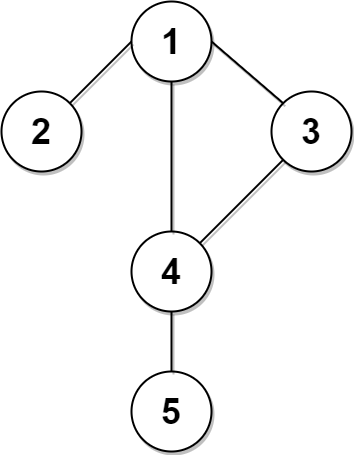

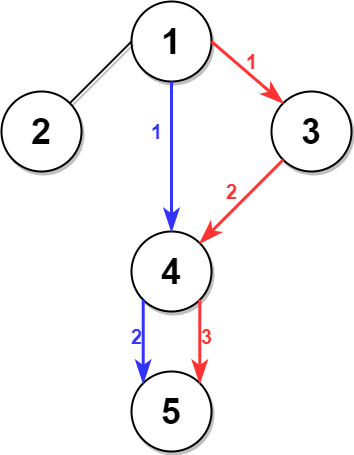
       

Input: n = 5, edges = [[1,2],[1,3],[1,4],[3,4],[4,5]], time = 3, change = 5
Output: 13
Explanation:
The figure on the left shows the given graph.
The blue path in the figure on the right is the minimum time path.
The time taken is:
- Start at 1, time elapsed=0
- 1 -> 4: 3 minutes, time elapsed=3
- 4 -> 5: 3 minutes, time elapsed=6
Hence the minimum time needed is 6 minutes.

The red path shows the path to get the second minimum time.
- Start at 1, time elapsed=0
- 1 -> 3: 3 minutes, time elapsed=3
- 3 -> 4: 3 minutes, time elapsed=6
- Wait at 4 for 4 minutes, time elapsed=10
- 4 -> 5: 3 minutes, time elapsed=13
Hence the second minimum time is 13 minutes.      

Example 2:

Input: n = 2, edges = [[1,2]], time = 3, change = 2
Output: 11
Explanation:
The minimum time path is 1 -> 2 with time = 3 minutes.
The second minimum time path is 1 -> 2 -> 1 -> 2 with time = 11 minutes.

 

Constraints:

    2 <= n <= 104
    n - 1 <= edges.length <= min(2 * 104, n * (n - 1) / 2)
    edges[i].length == 2
    1 <= ui, vi <= n
    ui != vi
    There are no duplicate edges.
    Each vertex can be reached directly or indirectly from every other vertex.
    1 <= time, change <= 103



In [ ]:
class Solution:
    def secondMinimum(self, n: int, edges: List[List[int]], time: int, change: int) -> int:
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)

        q = deque()
        dist1 = [-1] * (n + 1)
        dist2 = [-1] * (n + 1)

        q.append((1, 1))
        dist1[1] = 0

        while q:
            node, freq = q.popleft()
            time_taken = dist1[node] if freq == 1 else dist2[node]

            if (time_taken // change) % 2:
                time_taken = change * (time_taken // change + 1) + time
            else:
                time_taken += time

            for neighbor in adj[node]:
                if dist1[neighbor] == -1:
                    dist1[neighbor] = time_taken
                    q.append((neighbor, 1))
                elif dist2[neighbor] == -1 and dist1[neighbor] != time_taken:
                    if neighbor == n:
                        return time_taken
                    dist2[neighbor] = time_taken
                    q.append((neighbor, 2))

        return 0